In [1]:
import pandas as pd

In [2]:
df=pd.read_pickle('/data/jfraile/Programs/COP27/datasets_with_answer/political_narratives_validation_only_none_narrative.pkl')

In [3]:
# Función segura para convertir a int
def safe_int(x):
    try:
        return int(x)
    except ValueError:
        return x

# Aplicar a toda la columna
df['narratives'] = df['narratives'].apply(lambda lst: [safe_int(x) for x in lst])


In [4]:
def has_string(arr):
    """Return True if the list contains at least one string, otherwise False."""
    return any(isinstance(item, str) for item in arr)

In [5]:
df['string']=df['narratives'].apply(has_string)

In [6]:
df[df['string']==True]

,id,text,lang,narratives,string
5,1589743590242385921,Por supuesto que el discurso de Petro en #COP2...,es,[Criticism of leadership style],True
10,1594021001502674944,@robbierobgarcif Con excusa del “cambio climát...,es,"[1, 7, Conspiracy about global control]",True
21,1592570999241048066,"✅. A ver ,a quién no le gusta bañarse en Novie...",es,"[3, 7, Narrative: Minimizar la gravedad indivi...",True
31,1590152051069423617,@DiazCanelB Ya borraste el desastre medioambie...,es,"[1, 2, Narrative: Desacreditar a líderes espec...",True
38,1591454922092187655,800 JETS PRIVADOS HAN LLEGADO A #EGIPTO INCLUI...,es,"[5, 7, Narrative: Hipocresía de élites en la l...",True
...,...,...,...,...,...
19973,1592961793642860544,Very exciting news. #equity #climate #COP27 ht...,en,[Fomentar una Narrativa de Esperanza y Empoder...,True
19975,1590543309155766273,@CalgaryPolice - just warming up the sky with ...,en,"[Desacreditar las Instituciones Clave, Minimiz...",True
19976,1589656395162718210,"@RishiSunak Are you awake and listening, Rishi...",en,"[Desacreditar las Instituciones Clave, Minimiz...",True
19978,1589710917859938304,Humanitarian access blocked in #Tigray. No ban...,en,[Localizar el Impacto],True


In [7]:
dic={
1: "Sembrar la Duda sobre la Ciencia",
2: "Desacreditar las Instituciones Clave",
3: "Minimizar la Gravedad (Retardismo)",
4: "Explotar el Costo Económico",
5: "Promover la Inacción (Shifting the Blame)",
6: "Promover Soluciones Dilatorias (Retardismo Tecnológico)",
7: "Polarización y Movilización Antirregulación",
8: "Infiltración y Cabildeo Directo",
9: "Establecer la Urgencia y la Base Científica",
10: "Localizar el Impacto",
11: "Conectar Mitigación y Adaptación",
12: "Fomentar una Narrativa de Esperanza y Empoderamiento",
13: "Presionar por una Mayor Ambición (Aumento de las NDC)",
14: "Visibilizar el Liderazgo y la Responsabilidad",
15: "Asegurar la Financiación Climática",
16: "Promover una Transición Justa",
17: "Reforzar el Multilateralismo",
18: "Incorporar al Sector Privado",
19: "Fomentar la Participación Inclusiva",
20: "Divulgar Resultados y Herramientas"
}

In [8]:
key = next((k for k, v in dic.items() if 'Divulgar Resultados y Herramientas' in v), None)

In [9]:
for i in range(len(df)):
    # print(i)
    l=df['narratives'].iloc[i]
    for j in range(len(l)):
        # print(l[j])
        key = next((k for k, v in dic.items() if str(l[j]) in v), None)
        if key!=None:
            l[j]=key
    df.at[i, 'narratives']=l

In [10]:
df['string_2']=df['narratives'].apply(has_string)

In [ ]:
def clear_narratives(array):
    l=[]
    for x in array:
        if x in list(range(1,21)):
            l.append(x)
        else:
            pass
    return l


In [12]:
df['narratives_clear']=df['narratives'].apply(clear_narratives)

In [41]:
df_objectives_en=pd.read_pickle('/data/jfraile/Programs/gemini_multiprocessing_multiple_scripts/final_dataset/cop27_full_en_20.pkl')
df_objectives_es=pd.read_pickle('/data/jfraile/Programs/COP27/datasets_with_answer/objectives_cop_no_guide_cop27_es_original_full_text_batch_20.pkl')
df_objectives=pd.concat([df_objectives_en, df_objectives_es], ignore_index=True)

In [42]:
df_complete=pd.merge(df, df_objectives[['id', 'objectives']], on='id')

In [43]:
df_complete

,id,text,lang,narratives,string,string_2,narratives_clear,objectives
0,1590345075015680002,With NIOZ director @han_dolman @gcos_un #COP27...,es,[],False,False,[],[]
1,1589943347359387653,@QuinteroCalle @elpais_america El 3er punto de...,es,"[17, 5]",False,False,"[17, 5]",[6]
2,1589625822809579520,Qué pasó que GuaidoG no está en la #COP27? 😂,es,[],False,False,[],[4]
3,1589444416837627904,#COP27 \n👉 El tema ahora es el financiamiento ...,es,"[15, 10]",False,False,"[15, 10]",[2]
4,1590073066738315264,Fundación Natura participa en la #COP27 como o...,es,"[18, 19]",False,False,"[18, 19]",[1]
...,...,...,...,...,...,...,...,...
19995,1592708815551856642,Idea: how about @GeorgeHeyman you meet with @S...,en,"[7, 15]",False,False,"[7, 15]",[5]
19996,1592502093214253056,Join Kenya platform for climate Governance Nat...,en,[19],False,False,[19],[6]
19997,1591687280288493568,Thank you Minister. The hard decisions must be...,en,"[15, 10]",False,False,"[15, 10]","[1, 6]"
19998,1589656766941343744,"While Ethiopia does not produce a lot of CO2, ...",en,"[14, 18]",False,False,"[14, 18]","[1, 6]"


In [44]:
df_match=pd.read_csv('subobjectives_objectives.csv')
df_match.columns = ['sub_id', 1, 2, 3, 4, 5, 6, 7]

In [45]:
dic_match={}
for idx, row in df_match.iterrows():
    l=[]
    for i in range(1,8):
        if row[i]=='VERDADERO':
            l.append(i)
    dic_match[row['sub_id']]=l

In [46]:
dic_match

{1: [4],
 2: [4],
 3: [7],
 4: [5],
 5: [7],
 6: [7],
 7: [3],
 8: [1],
 9: [2],
 10: [6],
 11: [2],
 12: [6],
 13: [6],
 14: [6],
 15: [6],
 16: [6],
 17: [1],
 18: [6],
 19: [6],
 20: [1]}

In [47]:
def get_objectives_from_subobjectives(array):
    l=[]
    for x in array:
        l=l+dic_match[x]
    
    return list(set(l))

In [48]:
df_complete['objectives_from_subobjectives']=df_complete['narratives_clear'].apply(get_objectives_from_subobjectives)

In [49]:
def clear_objectives(array):
    l=[]
    for x in array:
        if x in list(range(1,8)):
            l.append(x)
        else:
            pass
    return l


In [50]:
def convert_empty_array(array):
    l=[]
    if len(array)==0:
        return [0]
    else:
        return array

In [51]:
df_complete['objectives']=df_complete['objectives'].apply(clear_objectives)
df_complete['objectives']=df_complete['objectives'].apply(convert_empty_array)
df_complete['objectives_from_subobjectives']=df_complete['objectives_from_subobjectives'].apply(convert_empty_array)

In [52]:
confusion_dic={}
for i in range(0,8):
    confusion_dic[i]={}
    for j in range(0,8):
        confusion_dic[i][j]=0

In [53]:
confusion_dic

{0: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0},
 1: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0},
 2: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0},
 3: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0},
 4: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0},
 5: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0},
 6: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0},
 7: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}}

In [ ]:
for idx, row in df_complete.iterrows():
    # print(idx)
    for i in row['objectives']:
        for j in row['objectives_from_subobjectives']:
            confusion_dic[i][j]+=1


In [56]:
confusion_dic

{0: {0: 996, 1: 805, 2: 318, 3: 44, 4: 122, 5: 79, 6: 1116, 7: 154},
 1: {0: 266, 1: 1804, 2: 1269, 3: 88, 4: 83, 5: 160, 6: 4918, 7: 248},
 2: {0: 25, 1: 586, 2: 308, 3: 16, 4: 15, 5: 25, 6: 1345, 7: 67},
 3: {0: 119, 1: 128, 2: 67, 3: 126, 4: 95, 5: 39, 6: 316, 7: 62},
 4: {0: 308, 1: 275, 2: 71, 3: 561, 4: 869, 5: 331, 6: 811, 7: 519},
 5: {0: 37, 1: 158, 2: 87, 3: 246, 4: 338, 5: 146, 6: 606, 7: 387},
 6: {0: 127, 1: 1650, 2: 2493, 3: 313, 4: 137, 5: 301, 6: 6635, 7: 615},
 7: {0: 37, 1: 169, 2: 129, 3: 159, 4: 230, 5: 153, 6: 400, 7: 357}}

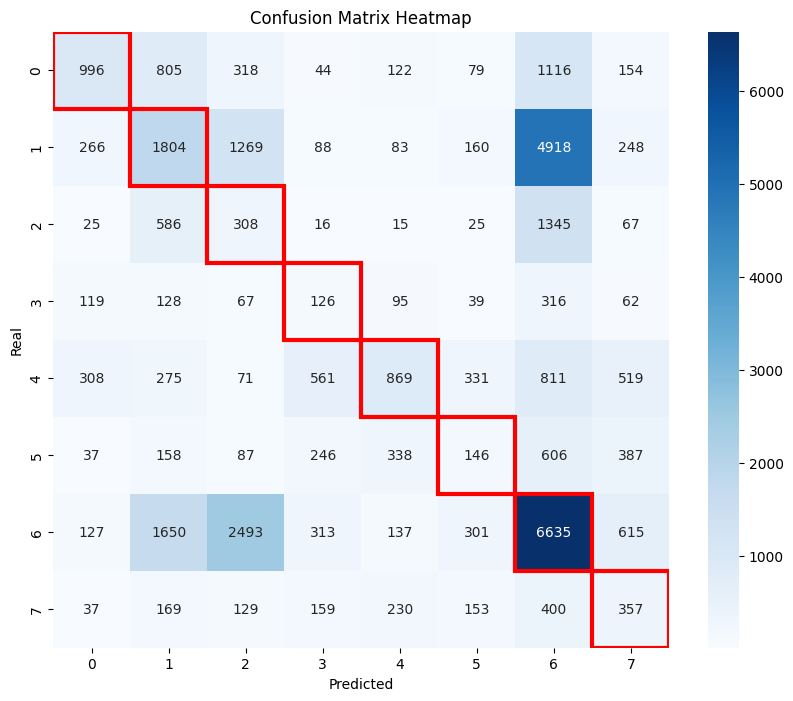

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convierte tu diccionario en DataFrame
cm_df = pd.DataFrame({k: v for k, v in confusion_dic.items()}).T

plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=True, square=True)

# Resalta la diagonal
for i in range(len(cm_df)):
    ax.add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='red', lw=3))

plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Confusion Matrix Heatmap")
plt.show()


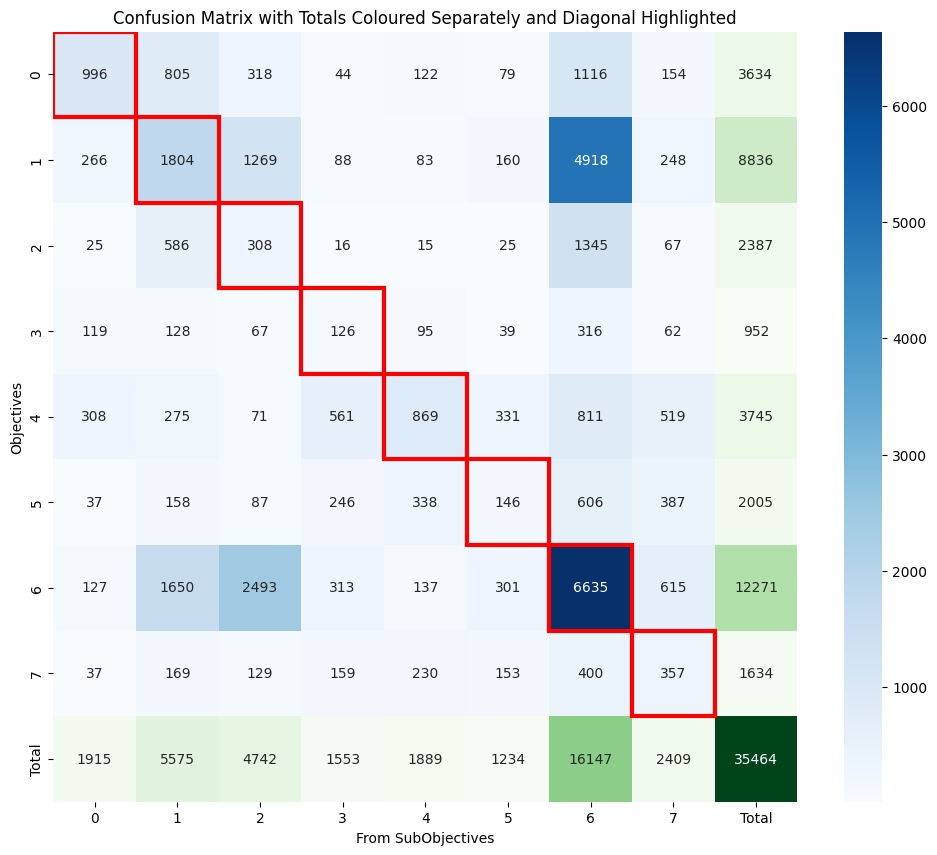

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Convierte tu diccionario en DataFrame
cm_df = pd.DataFrame({k: v for k, v in confusion_dic.items()}).T

# Calcula totales
col_sum = cm_df.sum(axis=0)
row_sum = cm_df.sum(axis=1)

# Añade fila de totales en la parte superior
cm_with_totals = cm_df.copy()
cm_with_totals.loc['Total'] = col_sum

# Añade columna de totales a la derecha
cm_with_totals['Total'] = list(row_sum) + [row_sum.sum()]

# Crea máscaras
main_mask = np.zeros_like(cm_with_totals, dtype=bool)
main_mask[-1, :] = True  # fila total
main_mask[:, -1] = True  # columna total

totals_mask = ~main_mask  # para el heatmap de totales (invertido si quieres)

plt.figure(figsize=(12, 10))

# Heatmap principal (azul) excluyendo totales
sns.heatmap(cm_with_totals, annot=True, fmt="d", cmap="Blues", square=False, vmax=6635, mask=main_mask, cbar=True)

# Heatmap de totales encima (otro cmap)
sns.heatmap(cm_with_totals, annot=True, fmt="d", cmap="Greens", square=False, mask=~main_mask, cbar=False)

# Resalta la diagonal del heatmap principal
for i in range(len(cm_df)):
    plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='red', lw=3))

plt.xlabel("From SubObjectives")
plt.ylabel("Objectives")
plt.title("Confusion Matrix with Totals Coloured Separately and Diagonal Highlighted")
plt.show()
